# Цель исследования:
**Определение перспективного тарифа для телеком-компании**

<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Calls" data-toc-modified-id="Calls-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Calls</a></span></li><li><span><a href="#Internet" data-toc-modified-id="Internet-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Internet</a></span></li><li><span><a href="#Message" data-toc-modified-id="Message-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Message</a></span></li><li><span><a href="#Tarif" data-toc-modified-id="Tarif-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Tarif</a></span></li><li><span><a href="#Users" data-toc-modified-id="Users-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Users</a></span></li><li><span><a href="#Предобработка" data-toc-modified-id="Предобработка-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Предобработка</a></span></li><li><span><a href="#Подведем-итоги-по-анализу-абонентов." data-toc-modified-id="Подведем-итоги-по-анализу-абонентов.-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Подведем итоги по анализу абонентов.</a></span></li><li><span><a href="#Проверка-гипотез" data-toc-modified-id="Проверка-гипотез-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>Проверка гипотез</a></span></li><li><span><a href="#Общий-вывод" data-toc-modified-id="Общий-вывод-9"><span class="toc-item-num">9&nbsp;&nbsp;</span>Общий вывод</a></span></li></ul></div>

In [1]:
import pandas as pd
import numpy as np
import math
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as st

In [2]:
df_calls = pd.read_csv('/datasets/calls.csv')
df_internet = pd.read_csv('/datasets/internet.csv')
df_mess= pd.read_csv('/datasets/messages.csv')
df_tarif=pd.read_csv('/datasets/tariffs.csv')
df_users=pd.read_csv('/datasets/users.csv')

## Calls 


In [3]:
df_calls.head(5)

,id,call_date,duration,user_id
0,1000_0,2018-07-25,0.00,1000
1,1000_1,2018-08-17,0.00,1000
2,1000_2,2018-06-11,2.85,1000
3,1000_3,2018-09-21,13.80,1000
4,1000_4,2018-12-15,5.18,1000


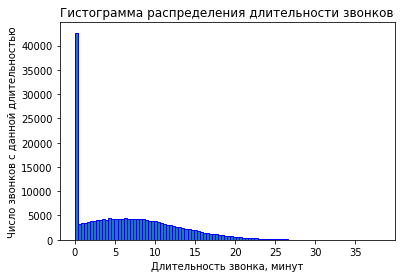

In [4]:
df_calls['duration'].plot(kind='hist', ec='blue', bins=100);
plt.title('Гистограмма распределения длительности звонков')
plt.xlabel('Длительность звонка, минут')
plt.ylabel('Число звонков с данной длительностью')
plt.legend().remove()
plt.show()

Выбивающихся значений нет, все в рамках разумного. 

В среднем разговор длиться 5-8 минут. Самый продолжительный 38 мин. 
Звонок в 0 минут, по условиям задачи - это пропущенный звонок. 
Таких звонков 20%, это много. 

Предположу,что к таким звонкам относятся и ситуация "абонент не абонент"
Код ниже частично подтверждает данную теорию... 
Т.е. не дозвонившись или не получив ответ на звонок, пользователь направлял абоненту СМС-ку.


*************
( в дни, когда фиксировался звонок в 0 минут, пользователем направлялись СМС-ки.)

df_calls[(df_calls['user_id']==1000) & (df_calls['duration']==0)].sort_values('call_date', ascending=True).head(10)
df_mess[df_mess['user_id']==1000].sort_values('message_date', ascending=True).head(30)




In [5]:
df_calls.describe()


,duration,user_id
count,202607.000000,202607.000000
mean,6.755887,1253.940619
std,5.843365,144.722751
min,0.000000,1000.000000
25%,1.300000,1126.000000
50%,6.000000,1260.000000
75%,10.700000,1379.000000
max,38.000000,1499.000000


Здесь нас интересует столбец  
•	duration — длительность звонка в минутах, и дата звонка.

Видим, что фиксируется длительность звонка с точностью до секунды, но при существующих условиях тарификации «Мегалайн»  требуется округлить секунды до минут. Т.е. необходимо округлить в большую сторону.

**Столбец call_date необходимо ривести к формату даты, а не строки**. Ниже, в разделе Предобработка, сделаем это.

In [6]:
df_calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         202607 non-null  object 
 1   call_date  202607 non-null  object 
 2   duration   202607 non-null  float64
 3   user_id    202607 non-null  int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 6.2+ MB


In [7]:
df_calls.isna().sum()

id           0
call_date    0
duration     0
user_id      0
dtype: int64

Отлично, пропусков нет.

по аналогии отработаем датасет df_internet.

## Internet

In [8]:
df_internet.head(5)

,Unnamed: 0,id,mb_used,session_date,user_id
0,0,1000_0,112.95,2018-11-25,1000
1,1,1000_1,1052.81,2018-09-07,1000
2,2,1000_2,1197.26,2018-06-25,1000
3,3,1000_3,550.27,2018-08-22,1000
4,4,1000_4,302.56,2018-09-24,1000


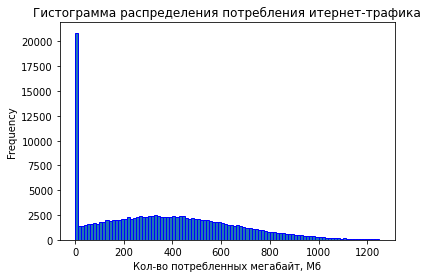

In [9]:
df_internet['mb_used'].plot(kind='hist', ec='blue', bins=100,range = (0,1250));
plt.title('Гистограмма распределения потребления итернет-трафика')
plt.xlabel('Кол-во потребленных мегабайт, Мб')
plt.legend().remove()
plt.show()

 по аналогии с датасетом звонков... выбивающихся значений не наблюдаются... с 0-м мегабайтом, ситуация возможно
 похожа со "Звонком", в дни когда была любая другая активность кроме "Интернет", это день фиксировался с 0-м траффиком

In [10]:
df_internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Unnamed: 0    149396 non-null  int64  
 1   id            149396 non-null  object 
 2   mb_used       149396 non-null  float64
 3   session_date  149396 non-null  object 
 4   user_id       149396 non-null  int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 5.7+ MB


In [11]:
df_internet.isna().sum() # пропуски...

Unnamed: 0      0
id              0
mb_used         0
session_date    0
user_id         0
dtype: int64

## Message

In [12]:
#df_mess[df_mess['user_id']==1001]
df_mess.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            123036 non-null  object
 1   message_date  123036 non-null  object
 2   user_id       123036 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 2.8+ MB


In [13]:
df_mess.isna().sum()

id              0
message_date    0
user_id         0
dtype: int64

In [14]:
# посмотрим ситуацию по отправленным СМС-кам...
# Видим, что не все пользователи пользовались отправкой СМС (426 против 500), есть "спамеры" с 1463 СМС-ми...
SMS = df_mess.groupby('user_id').count()
SMS.describe()

,id,message_date
count,426.000000,426.000000
mean,288.816901,288.816901
std,267.607552,267.607552
min,1.000000,1.000000
25%,85.750000,85.750000
50%,215.500000,215.500000
75%,414.000000,414.000000
max,1463.000000,1463.000000


In [15]:
df_mess.head(5)

,id,message_date,user_id
0,1000_0,2018-06-27,1000
1,1000_1,2018-10-08,1000
2,1000_2,2018-08-04,1000
3,1000_3,2018-06-16,1000
4,1000_4,2018-12-05,1000


## Tarif

In [16]:
df_tarif.head(5) # видим назание тарифа и его тарификация услуг...

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


## Users

In [17]:
df_users.head(5)
# 500 пользователей (38 юзеров на момент выборки расторгли контракты, в дальнейшем, избавимся от них) 

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,NaN,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,NaN,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
3,1003,23,NaN,Москва,Белла,Белякова,2018-08-17,ultra
4,1004,68,NaN,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra


In [18]:
df_users.isna().sum()

user_id         0
age             0
churn_date    462
city            0
first_name      0
last_name       0
reg_date        0
tariff          0
dtype: int64

In [19]:
# заполним пока пропуски нулем (т.е. примем, что 0 - это контракт действовал на момент выборки)
df_users['churn_date'] = df_users['churn_date'].fillna(0)
# df_users = df_users[df_users['churn_date']==0] 

In [20]:
df_users.isna().sum()

user_id       0
age           0
churn_date    0
city          0
first_name    0
last_name     0
reg_date      0
tariff        0
dtype: int64

## Предобработка

In [21]:
df_calls['duration']=df_calls['duration'].apply(math.ceil) # округляем в большую сторону
df_calls['call_date'] = pd.to_datetime(df_calls['call_date'], format='%Y-%m-%d') # приводим к формату времени
df_calls['month'] = df_calls['call_date'].dt.month # создаем столбец "месяц"


#df_internet['mb_used']=df_internet['mb_used'].apply(math.ceil)
df_internet['session_date'] = pd.to_datetime(df_internet['session_date'], format='%Y-%m-%d')
df_internet['month'] = df_internet['session_date'].dt.month


df_mess['message_date'] = pd.to_datetime(df_mess['message_date'], format='%Y-%m-%d')
df_mess['month']= df_mess['message_date'].dt.month

df_users['reg_date'] = pd.to_datetime(df_users['reg_date'], format='%Y-%m-%d')
df_users['reg_month']= df_users['reg_date'].dt.month

In [22]:
for df in [df_calls, df_mess,df_internet ]: display(df.head(5)) 

,id,call_date,duration,user_id,month
0,1000_0,2018-07-25,0,1000,7
1,1000_1,2018-08-17,0,1000,8
2,1000_2,2018-06-11,3,1000,6
3,1000_3,2018-09-21,14,1000,9
4,1000_4,2018-12-15,6,1000,12


,id,message_date,user_id,month
0,1000_0,2018-06-27,1000,6
1,1000_1,2018-10-08,1000,10
2,1000_2,2018-08-04,1000,8
3,1000_3,2018-06-16,1000,6
4,1000_4,2018-12-05,1000,12


,Unnamed: 0,id,mb_used,session_date,user_id,month
0,0,1000_0,112.95,2018-11-25,1000,11
1,1,1000_1,1052.81,2018-09-07,1000,9
2,2,1000_2,1197.26,2018-06-25,1000,6
3,3,1000_3,550.27,2018-08-22,1000,8
4,4,1000_4,302.56,2018-09-24,1000,9


Отдельно хотел проверить, как распределяется время разговоров пользователей по месяцам
это распределение стало для меня неожиданным.   
Наблюдается стабильный, резкий рост, никаких вариантов:
"в марте пользователи общаются больше чем в июне..." Ниже сформировал график подключения новых пользователей.
 Предположу , что такой рост длительности разговоров связан с эффетом увеличения базы клиентов и стремлением клиентов выбрать уже проплаченные минуты. Похоже, что выгрузка сформирована в период становления-запуска новых тарифов...

In [23]:
pivot_calls = df_calls.pivot_table(index='month', values=['duration'], aggfunc='sum')

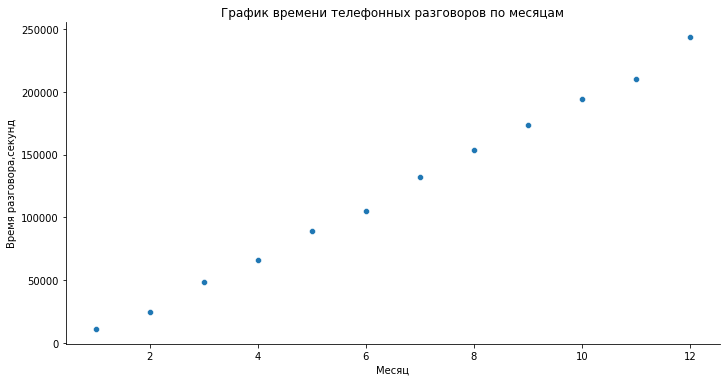

In [24]:
sns.relplot(x=pivot_calls.index, y='duration', data=pivot_calls, height=5, aspect=2);
plt.title('График времени телефонных разговоров по месяцам')
plt.ylabel('Время разговора,секунд')
plt.xlabel('Месяц')
plt.show()

In [25]:
pivot_reg_users = df_users.pivot_table(index='reg_month', values=['user_id'], aggfunc='count')

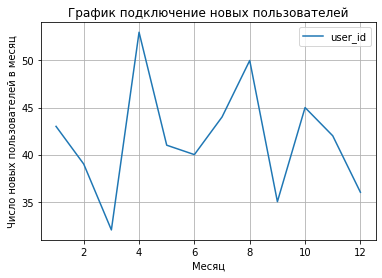

In [26]:
fig, ax = plt.subplots(1,1)
pivot_reg_users.plot(ax=ax, grid=True);
plt.title('График подключение новых пользователей')
plt.ylabel('Число новых пользователей в месяц')
plt.xlabel('Месяц');

In [27]:
pivot_reg_users.describe()

,user_id
count,12.000000
mean,41.666667
std,6.005048
min,32.000000
25%,38.250000
50%,41.500000
75%,44.250000
max,53.000000


Проведем следующие расчеты для каждого пользователя:

•	количество сделанных звонков и израсходованных минут разговора по месяцам;

•	количество отправленных сообщений по месяцам;

•	объем израсходованного интернет-трафика по месяцам;

•	помесячную выручку с каждого пользователя



**Создадим таблицу включающую данные по звонкам и пользователям. Объединим.**

In [28]:
merge_calls_users = df_calls.merge(df_users, on='user_id', how='inner')
merge_calls_users

,id,call_date,duration,user_id,month,age,churn_date,city,first_name,last_name,reg_date,tariff,reg_month
0,1000_0,2018-07-25,0,1000,7,52,0,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,5
1,1000_1,2018-08-17,0,1000,8,52,0,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,5
2,1000_2,2018-06-11,3,1000,6,52,0,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,5
3,1000_3,2018-09-21,14,1000,9,52,0,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,5
4,1000_4,2018-12-15,6,1000,12,52,0,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
202602,1499_215,2018-12-26,1,1499,12,35,0,Пермь,Гектор,Корнилов,2018-09-27,smart,9
202603,1499_216,2018-10-18,19,1499,10,35,0,Пермь,Гектор,Корнилов,2018-09-27,smart,9
202604,1499_217,2018-11-10,11,1499,11,35,0,Пермь,Гектор,Корнилов,2018-09-27,smart,9
202605,1499_218,2018-10-06,5,1499,10,35,0,Пермь,Гектор,Корнилов,2018-09-27,smart,9


**Создадим сводную таблицу с мультиндексом, в которой соберем инфу о пользователе, тарифе, кол-ве звоноков и  их длительности**

In [29]:
calls_pivot = merge_calls_users.pivot_table(index=['user_id','month','tariff'],
                                            values='duration', aggfunc=['count', 'sum'])
calls_pivot.columns = ['count_calls','duration']
calls_pivot

count_calls  duration
user_id month tariff                       
1000    5     ultra            22       159
        6     ultra            43       172
        7     ultra            47       340
        8     ultra            52       408
        9     ultra            58       466
...                           ...       ...
1498    10    smart            41       247
1499    9     smart             9        70
        10    smart            68       449
        11    smart            74       612
        12    smart            69       492

[3174 rows x 2 columns]

**аналогично, "вытащим" инфу по потребленным мегабайтам**

In [30]:
merge_internet_users = df_internet.merge(df_users, on='user_id', how='inner')
internet_pivot = merge_internet_users.pivot_table(index=['user_id', 'month','tariff'], 
                                                  values='mb_used',aggfunc='sum')
internet_pivot.head(10)

mb_used
user_id month tariff          
1000    5     ultra    2253.49
        6     ultra   23233.77
        7     ultra   14003.64
        8     ultra   14055.93
        9     ultra   14568.91
        10    ultra   14702.49
        11    ultra   14756.47
        12    ultra    9817.61
1001    11    smart   18429.34
        12    smart   14036.66

**SMS-кам**

In [31]:
merge_mess_users = df_mess.merge(df_users, on='user_id', how='inner')
mess_pivot = merge_mess_users.pivot_table(index=['user_id', 'month','tariff'], 
                                          values='message_date',aggfunc='count')
mess_pivot.columns = ['count_sms']
mess_pivot.head()

count_sms
user_id month tariff           
1000    5     ultra          22
        6     ultra          60
        7     ultra          75
        8     ultra          81
        9     ultra          57

**Объединим все сводные таблицы**

In [32]:
pivot2 = pd.merge(calls_pivot, internet_pivot,on = ['user_id','month','tariff'],how='outer')

In [33]:
all_pivot = pd.merge(pivot2, mess_pivot,on = ['user_id','month','tariff'],how='outer')

In [34]:
for _ in df_users['user_id']:
    all_pivot.loc[_, 'tariff'] = df_users.loc[_-1000, 'tariff']

/opt/conda/lib/python3.9/site-packages/IPython/core/interactiveshell.py:2898: PerformanceWarning: indexing past lexsort depth may impact performance.
  result = self._run_cell(


In [35]:
all_pivot.isna().sum()

count_calls     42
duration        42
mb_used         13
count_sms      499
tariff           0
dtype: int64

In [36]:
# в объединенной таблице видим новый столбец count_sms (которого не было в "1-й" таблице)
# и он заполнился Nanами для тех абонентов, адишников которых не было во второй таблице -  mess_pivot
all_pivot.head(11)

count_calls  duration   mb_used  count_sms tariff
user_id month tariff                                                   
1000    5     ultra          22.0     159.0   2253.49       22.0  ultra
        6     ultra          43.0     172.0  23233.77       60.0  ultra
        7     ultra          47.0     340.0  14003.64       75.0  ultra
        8     ultra          52.0     408.0  14055.93       81.0  ultra
        9     ultra          58.0     466.0  14568.91       57.0  ultra
        10    ultra          57.0     350.0  14702.49       73.0  ultra
        11    ultra          43.0     338.0  14756.47       58.0  ultra
        12    ultra          46.0     333.0   9817.61       70.0  ultra
1001    11    smart          59.0     430.0  18429.34        NaN  smart
        12    smart          63.0     414.0  14036.66        NaN  smart
1002    6     smart          15.0     117.0  10856.82        4.0  smart

In [37]:
for _ in ['count_calls', 'duration', 'mb_used', 'count_sms']:
    all_pivot.loc[all_pivot[_].isna(),_]=0

In [38]:
all_pivot.isna().sum()

count_calls    0
duration       0
mb_used        0
count_sms      0
tariff         0
dtype: int64

In [39]:
print (merge_calls_users[merge_calls_users['user_id']==1001])

           id  call_date  duration  user_id  month  age churn_date    city  \
368    1001_0 2018-11-13        11     1001     11   41          0  Москва   
369    1001_1 2018-12-14        16     1001     12   41          0  Москва   
370    1001_2 2018-11-20         3     1001     11   41          0  Москва   
371    1001_3 2018-12-27         8     1001     12   41          0  Москва   
372    1001_4 2018-11-19        20     1001     11   41          0  Москва   
..        ...        ...       ...      ...    ...  ...        ...     ...   
485  1001_117 2018-12-10         0     1001     12   41          0  Москва   
486  1001_118 2018-12-16        21     1001     12   41          0  Москва   
487  1001_119 2018-11-15         4     1001     11   41          0  Москва   
488  1001_120 2018-11-17        16     1001     11   41          0  Москва   
489  1001_121 2018-12-16         4     1001     12   41          0  Москва   

    first_name last_name   reg_date tariff  reg_month  
368    

In [40]:
# в датафрейме СМС, нет юзера с айди = 1001
print (df_mess[df_mess['user_id']==1001])

Empty DataFrame
Columns: [id, message_date, user_id, month]
Index: []


<div class="alert alert-info"> **************************************</div>

In [41]:
all_pivot.head(10)

count_calls  duration   mb_used  count_sms tariff
user_id month tariff                                                   
1000    5     ultra          22.0     159.0   2253.49       22.0  ultra
        6     ultra          43.0     172.0  23233.77       60.0  ultra
        7     ultra          47.0     340.0  14003.64       75.0  ultra
        8     ultra          52.0     408.0  14055.93       81.0  ultra
        9     ultra          58.0     466.0  14568.91       57.0  ultra
        10    ultra          57.0     350.0  14702.49       73.0  ultra
        11    ultra          43.0     338.0  14756.47       58.0  ultra
        12    ultra          46.0     333.0   9817.61       70.0  ultra
1001    11    smart          59.0     430.0  18429.34        0.0  smart
        12    smart          63.0     414.0  14036.66        0.0  smart

In [42]:
df_users.head(10)

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff,reg_month
0,1000,52,0,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,5
1,1001,41,0,Москва,Иван,Ежов,2018-11-01,smart,11
2,1002,59,0,Стерлитамак,Евгений,Абрамович,2018-06-17,smart,6
3,1003,23,0,Москва,Белла,Белякова,2018-08-17,ultra,8
4,1004,68,0,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra,5
5,1005,67,0,Набережные Челны,Афанасий,Горлов,2018-01-25,smart,1
6,1006,21,0,Ульяновск,Леонид,Ермолаев,2018-02-26,smart,2
7,1007,65,0,Москва,Юна,Березина,2018-04-19,smart,4
8,1008,63,0,Челябинск,Рустэм,Пономарёв,2018-12-19,smart,12
9,1009,24,0,Пермь,Василиса,Блинова,2018-03-22,smart,3


In [43]:
# вытащим один раз параметры тарифов, чтобы в дальнейшем работать с извеcтными значениями
limit_sms_smart = df_tarif.loc[0,'messages_included']
limit_sms_ultra = df_tarif.loc[1,'messages_included']

limit_mb_smart = df_tarif.loc[0,'mb_per_month_included']/1024 # приведем к Гб
limit_mb_ultra = df_tarif.loc[1,'mb_per_month_included']/1024

limit_minutes_smart = df_tarif.loc[0,'minutes_included']
limit_minutes_ultra = df_tarif.loc[1,'minutes_included']


tariff_smart = df_tarif.loc[0,'rub_monthly_fee']
tariff_ultra = df_tarif.loc[1,'rub_monthly_fee']

cost_mb_smart = df_tarif.loc[0,'rub_per_gb']
cost_mb_ultra = df_tarif.loc[1,'rub_per_gb']

cost_sms_smart = df_tarif.loc[0,'rub_per_message']
cost_sms_ultra = df_tarif.loc[1,'rub_per_message']

cost_minute_smart = df_tarif.loc[0,'rub_per_minute']
cost_minute_ultra = df_tarif.loc[1,'rub_per_minute']

 **Посчитаем помесячную выручку с каждого пользователя**

In [44]:
"""
%%time 
for indx in all_pivot.index:
    delta_minuts= 0
    delta_mb = 0
    delta_sms = 0
    
    count_minuts = (all_pivot.loc[indx,'duration']).astype('int')
    count_mb = math.ceil(all_pivot.loc[indx,'mb_used']/1024)
    count_sms = (all_pivot.loc[indx,'count_sms']).astype('int')

    
    if indx[2] == 'smart':
        if count_minuts > limit_minutes_smart:
            delta_minuts = count_minuts - limit_minutes_smart            
        if count_mb > limit_mb_smart:
            delta_mb = count_mb - limit_mb_smart
        if count_sms > limit_sms_smart:
            delta_sms = count_sms - limit_sms_smart    
        
        total_cost = (tariff_smart + 
                      delta_minuts*cost_minute_smart + 
                      delta_mb*cost_mb_smart + 
                      delta_sms*cost_sms_smart)
        all_pivot.loc[indx, 'total_cost'] = total_cost 
        
    else:
        if count_minuts > limit_minutes_ultra:
            delta_minuts = count_minuts - limit_minutes_ultra
        if count_mb > limit_mb_ultra:
            delta_mb = count_mb - limit_mb_ultra
        if count_sms > limit_sms_ultra:
            delta_sms = count_sms - limit_sms_ultra
        
        total_cost = (tariff_ultra + 
                      delta_minuts*cost_minute_smart + 
                      delta_mb*cost_mb_smart + 
                      delta_sms*cost_sms_smart)
        all_pivot.loc[indx, 'total_cost'] = total_cost
""";


In [45]:
def def_total_cost(row):
    
    delta_minuts= 0
    delta_mb = 0
    delta_sms = 0
    count_minuts = row['duration']
    count_mb = math.ceil(row['mb_used']/1024)
    count_sms = row['count_sms']

    
    if row['tariff'] == 'smart':
        if count_minuts > limit_minutes_smart:
            delta_minuts = count_minuts - limit_minutes_smart            
        if count_mb > limit_mb_smart:
            delta_mb = count_mb - limit_mb_smart
        if count_sms > limit_sms_smart:
            delta_sms = count_sms - limit_sms_smart    
        
        total_cost = (tariff_smart + 
                      delta_minuts*cost_minute_smart + 
                      delta_mb*cost_mb_smart + 
                      delta_sms*cost_sms_smart)
    else:
        if count_minuts > limit_minutes_ultra:
            delta_minuts = count_minuts - limit_minutes_ultra
        if count_mb > limit_mb_ultra:
            delta_mb = count_mb - limit_mb_ultra
        if count_sms > limit_sms_ultra:
            delta_sms = count_sms - limit_sms_ultra
        
        total_cost = (tariff_ultra + 
                      delta_minuts*cost_minute_smart + 
                      delta_mb*cost_mb_smart + 
                      delta_sms*cost_sms_smart)
    return total_cost 

In [46]:
#%%time
all_pivot['total_cost'] = all_pivot.apply(def_total_cost,axis=1)

**Здесь, покажем эти цифры**

In [47]:
all_pivot.head(15)

count_calls  duration   mb_used  count_sms tariff  \
user_id month tariff                                                      
1000    5     ultra          22.0     159.0   2253.49       22.0  ultra   
        6     ultra          43.0     172.0  23233.77       60.0  ultra   
        7     ultra          47.0     340.0  14003.64       75.0  ultra   
        8     ultra          52.0     408.0  14055.93       81.0  ultra   
        9     ultra          58.0     466.0  14568.91       57.0  ultra   
        10    ultra          57.0     350.0  14702.49       73.0  ultra   
        11    ultra          43.0     338.0  14756.47       58.0  ultra   
        12    ultra          46.0     333.0   9817.61       70.0  ultra   
1001    11    smart          59.0     430.0  18429.34        0.0  smart   
        12    smart          63.0     414.0  14036.66        0.0  smart   
1002    6     smart          15.0     117.0  10856.82        4.0  smart   
        7     smart          26.0     214.0  17580.10       11.0  smart   
        8     smart          42.0     289.0  20319.26       13.0  smart   
        9     smart          36.0     206.0  16691.08        4.0  smart   
        10    smart          33.0     212.0  13888.25       10.0  smart   

                      total_cost  
user_id month tariff              
1000    5     ultra       1950.0  
        6     ultra       1950.0  
        7     ultra       1950.0  
        8     ultra       1950.0  
        9     ultra       1950.0  
        10    ultra       1950.0  
        11    ultra       1950.0  
        12    ultra       1950.0  
1001    11    smart       1150.0  
        12    smart        550.0  
1002    6     smart        550.0  
        7     smart       1150.0  
        8     smart       1550.0  
        9     smart        950.0  
        10    smart        550.0

**Проанализируем географию пользователей.**

In [48]:
count_users = len(df_users)# определяем кол-во пользователей

#группируем по городам, далее берем размер группы (.size() и делим на кол-во всех пользователей, тем самым получаем соотношение
city_users = df_users.groupby('city').size()/count_users 
city_users_base =  city_users[city_users >= 0.02].sort_values()
sum_other =  city_users[city_users < 0.02].sum()
city_users_base.loc['Все остальные'] = sum_other
count_other =  city_users[city_users < 0.02].count()
count_other

66

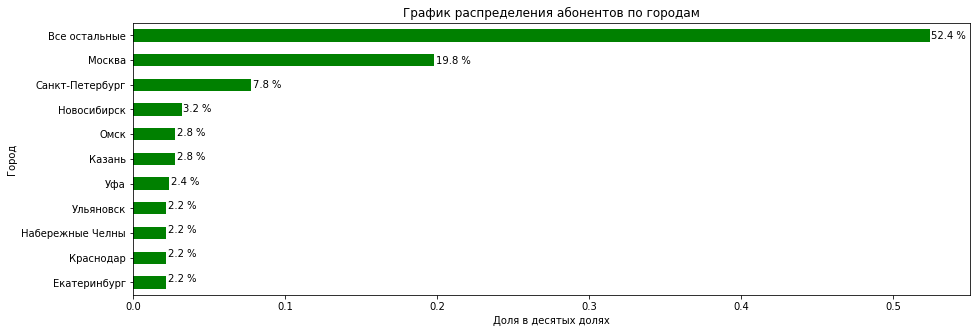

In [49]:
ax = city_users_base.plot(kind='barh', color='green', figsize=(15,5))
citys = dict(city_users_base)
i = 0
for city in citys:
    ax.text(citys[city]+0.001, i + 0.05,str(round(citys[city]*100, 1)) + ' %')
    if i < 10:
        i += 0.98
    else:
        i += 1.01
plt.title('График распределения абонентов по городам')
plt.ylabel('Город')
plt.xlabel('Доля в десятых долях');

Видим, что почти 30% базы абонентов сосредоточено в Москве и Спб. 

Всего 8 городов в базе абоннетов имеют долю больше 2,0%, все остальные абоненты, "размазаны" по 66-ти городам, их общая доля в базе свыше 50%.

In [50]:
# сводная таблица по интернет-трафику
city_m = df_users.merge(df_users, on='user_id', how='inner')
internet_pivot = merge_internet_users.pivot_table(index=['user_id', 'month','tariff'], values='mb_used',aggfunc='sum')
internet_pivot.head(10)

mb_used
user_id month tariff          
1000    5     ultra    2253.49
        6     ultra   23233.77
        7     ultra   14003.64
        8     ultra   14055.93
        9     ultra   14568.91
        10    ultra   14702.49
        11    ultra   14756.47
        12    ultra    9817.61
1001    11    smart   18429.34
        12    smart   14036.66

In [51]:
means_pivot = all_pivot.pivot_table(index=['user_id'], 
                                    values=['count_calls','duration','mb_used','count_sms','total_cost',],                                 
                                    aggfunc='mean')
                                   
means_pivot.head(10)

,count_calls,count_sms,duration,mb_used,total_cost
user_id,,,,,
1000,46.0,62.0,320.750000,13424.038750,1950.000000
1001,61.0,0.0,422.000000,16233.000000,850.000000
1002,31.0,10.0,216.714286,16576.645714,1035.714286
1003,104.0,76.0,764.400000,11456.128000,1950.000000
1004,22.0,149.0,123.375000,18629.935000,1950.000000
1005,74.0,46.0,550.416667,8307.275833,827.000000
1006,46.0,0.0,318.272727,14926.255455,931.818182
1007,68.0,25.0,486.555556,14625.074444,913.444444
1008,52.0,56.0,339.000000,13217.140000,568.000000


In [52]:
means_pivot.loc[:,'total_cost']=means_pivot.loc[:,'total_cost'].astype(int)
means_pivot.loc[:,'mb_used']=(means_pivot.loc[:,'mb_used']/1024).astype(int)
means_pivot.loc[:,'duration']=means_pivot.loc[:,'duration'].astype(int)
for _ in df_users['user_id']:
    means_pivot.loc[_, 'tariff'] = df_users.loc[_-1000, 'tariff']
    means_pivot.loc[_, 'city'] = df_users.loc[_-1000, 'city']
means_pivot.loc[means_pivot.city !='Москва','city'] = 'Другой'
means_pivot

,count_calls,count_sms,duration,mb_used,total_cost,tariff,city
user_id,,,,,,,
1000,46.0,62.0,320,13,1950,ultra,Другой
1001,61.0,0.0,422,15,850,smart,Москва
1002,31.0,10.0,216,16,1035,smart,Другой
1003,104.0,76.0,764,11,1950,ultra,Москва
1004,22.0,149.0,123,18,1950,ultra,Другой
...,...,...,...,...,...,...,...
1497,67.0,17.0,468,14,928,smart,Другой
1498,45.0,42.0,323,18,1659,smart,Другой
1499,55.0,46.0,405,12,952,smart,Другой


In [53]:
means_pivot = means_pivot.dropna(subset=['count_calls'])

**Проанализируем, какая часть абонентов использует тариф Смарт, а какая - Ультра**

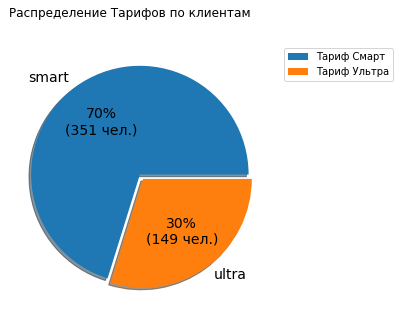

In [54]:
count_users = means_pivot['tariff'].count()
def date_tariff(date):
    count = date/100*count_users
    return "{:.0f}%\n({:.0f} чел.)".format(date, count)

axes = means_pivot.groupby('tariff')['tariff'].count().plot(kind='pie',subplots=True, fontsize=14,
                                                            shadow=True, explode=(0.05, 0),
                                                            title = 'Распределение Тарифов по клиентам', 
                                                            figsize=(15,5),autopct=lambda date: date_tariff(date))
for ax in axes:
    ax.legend(['Тариф Смарт', 'Тариф Ультра'], bbox_to_anchor=(1,1))
    ax.set_ylabel('')

70% абонентов пользуются пакетом с тарифом "Смарт", 30% тарифом "Ультра", а что по доходности, какой тариф больше приносит денег Оператору?

**Проанализируем, доходность и его долю в доходе от тарифа Смарт и Ультра**

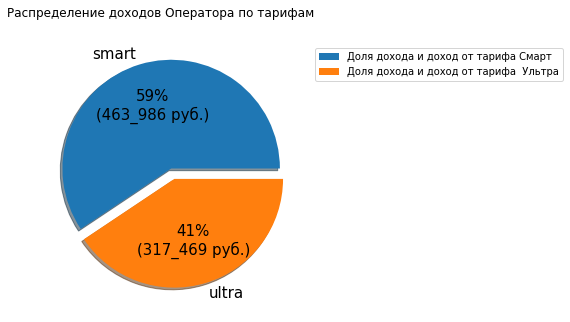

In [55]:
sum_tariff = means_pivot['total_cost'].sum()
def date_tariff(dt):
    val = dt/100*sum_tariff
    return "{:.0f}%\n({:_.0f} руб.)".format(dt, val)

axes = means_pivot.groupby('tariff')['total_cost'].sum().plot(kind='pie',subplots=True, fontsize=15,
                                                            shadow=True,explode = (0.10,0), 
                                                            title = 'Распределение доходов Оператора по тарифам', 
                                                            figsize=(15,5),autopct=lambda dt: date_tariff(dt))

for ax in axes:
    ax.legend(['Доля дохода и доход от тарифа Смарт', 'Доля дохода и доход от тарифа  Ультра'], bbox_to_anchor=(1,1))
    ax.set_ylabel('')

"Дешевый" пакет Смарт приносит почти 60% выручки. 
Можно предположить, что это происходит за счет оплачиваемых услуг сверх лимита пакета. 
Видим, что выручка 424 тыс.руб. Число абонентов 350 х 550(цена пакета смарт) = 193тыс.руб, т.е. абоненты Смарт не укладываются в пакет услуг и фактически оплачивают тариф Смарт - "дважды". 

Проверим это:

**Проанализируем длительность разговоров у абонентов с разными тарифными планами**

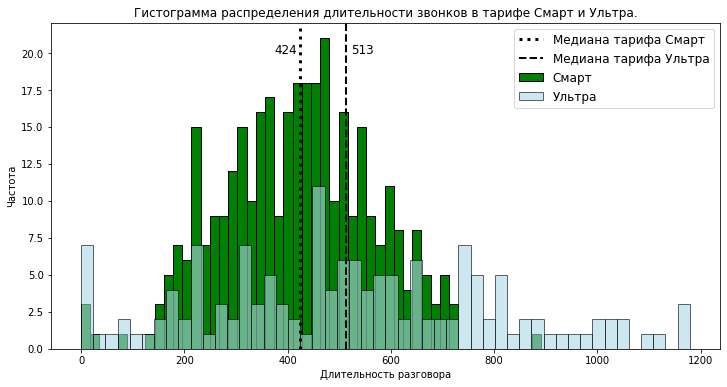

In [56]:
mpds = means_pivot[means_pivot['tariff'] == 'smart']['duration']
mpdu = means_pivot[means_pivot['tariff'] == 'ultra']['duration']

ax = plt.gca()

mpds.plot(kind='hist', bins=50, figsize=(12,6), ec='black', ax=ax, color='green')
mpdu.plot(kind='hist', bins=50, figsize=(12,6), ec='black', ax=ax, color='lightblue',alpha = 0.6)

plt.axvline(x=mpds.median(),linewidth=3, color='black', linestyle=':')
ax.text(mpds.median()-50, 20, '{0:.0f}'.format(mpds.median()),fontsize='large')
plt.axvline(x=mpdu.median(),linewidth=2, color='black', linestyle='--')
ax.text(mpdu.median()+10, 20, '{0:.0f}'.format(mpdu.median()), fontsize='large')
    
plt.legend(['Медиана тарифа Смарт', 'Медиана тарифа Ультра', 'Смарт', 'Ультра'], prop={'size':12});
plt.title('Гистограмма распределения длительности звонков в тарифе Смарт и Ультра.')
ax.set_xlabel('Длительность разговора')
ax.set_ylabel('Частота');

Предположение оказалось верным. 
Большая часть абонентов с тарифным планом Смарт не укладывабтся лимит пакета минут, и вынуждены нести дополнительные расходы.
Абоненты с тарифным планом Ультра, напротив, в среднем выбирают свой пакет минут всего на 15-20%.

Похожая картина и с потреблением интренет траффика.
Абоненты тарифа Смарт, выбирают лимит пакета практически полностью, и вынуждены оплачивать каждый дополнительный Гб
(медиана потребления траффика 15 Гб при лимите 15 Гб), абоненты Ульта в среднем "выбирают" 18 Гб, при лимите 30Гб.


**Проанализируем потребление интернет трафика у абонентов с разными тарифными планами**

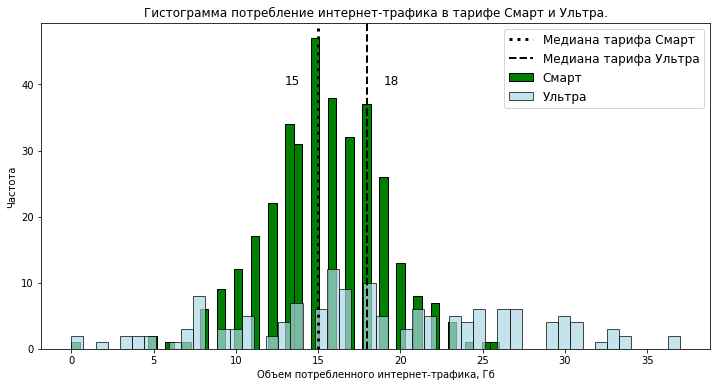

In [57]:
mpis = means_pivot[means_pivot['tariff'] == 'smart']['mb_used']
mpiu = means_pivot[means_pivot['tariff'] == 'ultra']['mb_used']

ax = plt.gca()

mpis.plot(kind='hist', bins=50, figsize=(12,6), ec='black', ax=ax, color='green')
mpiu.plot(kind='hist', bins=50, figsize=(12,6), ec='black', ax=ax, color='lightblue',alpha = 0.7)

plt.axvline(x=mpis.median(),linewidth=3, color='black', linestyle=':')
ax.text(mpis.median()-2, 40, '{0:.0f}'.format(mpis.median()),fontsize='large')
plt.axvline(x=mpiu.median(),linewidth=2, color='black', linestyle='--')
ax.text(mpiu.median()+1, 40, '{0:.0f}'.format(mpiu.median()), fontsize='large')
    
plt.legend(['Медиана тарифа Смарт', 'Медиана тарифа Ультра', 'Смарт', 'Ультра'], prop={'size':12});
plt.title('Гистограмма потребление интернет-трафика в тарифе Смарт и Ультра.')
ax.set_xlabel('Объем потребленного интернет-трафика, Гб')
ax.set_ylabel('Частота');

Ситуация по СМС фактически повторяется, абонентами с тарифом Смарт лимит СМС-ок выбирается практически полность (в среднем 33 СМС-ки из лимита 50), тогда как абоненты с тарифом Ультра СМС-ми практически не пользуются ими если сравнивать с лимитом  в 1000 СМС.

Среднее кол-во отправленных СМС абонентами Смарт = 32 шт.


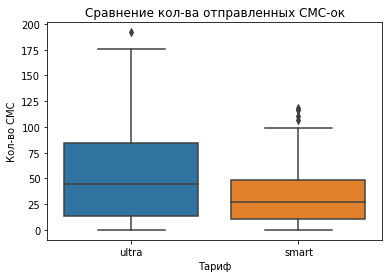

In [58]:
# посмотрим СМС-ки, через диаграмму размаха
sns.boxplot(x='tariff', y='count_sms', data=means_pivot);
plt.title('Сравнение кол-ва отправленных СМС-ок')
plt.ylabel('Кол-во СМС')
plt.xlabel('Тариф');
print ('Среднее кол-во отправленных СМС абонентами Смарт = {0:.0f} шт.'.format(means_pivot[means_pivot['tariff']=='smart']['count_sms'].mean()))


In [59]:
# планировал как в пред. проекте, удалить выбивающиеся значения, но отказался от этой идеи
"""
# Сначала создадим функцию, которая будут отбрасывать выбивающиеся значения, т.е. значения которые будут выше или ниже
# межквартильного интервала. (метод describe выше очень наглядно демонстрирует это)
def deleted_trash(column,df,k1=0.01,k2=2):
    qvarta = means_pivot[column].describe()
    data_25=qvarta[4]# вытаскиваем значение равное 25%
    data_75=qvarta[6]# вытаскиваем значение равное 75%
    low_25=k1*data_25 # k1 -должно быть меньше 0 т.к. задает допустимые значения до 25%, это чтобы совсем все лишнее не отсекать
    higth_75=k2* data_75 # к2 д.б. >1  т.к. задает допустимые значения свыше 75%, чтобы совсем все лишнее не отсекать
    length = 1
    index_del= []
    for index, el in enumerate(df[column]): # перебираем индексы столбца и его значения
        if low_25 > el or higth_75 < el: # все что меньше/больше межквартильго размаха - это выбросы, мусор, который уберем
            index_del.extend(df[df[column] == el].index) # формируем индексы на удаление 
    index_del= set(index_del)
    length = len(index_del)
    print('Удалено строк: {}.'.format(length))
    df.drop(index_del,axis=0,inplace=True)
deleted_trash('count_calls',means_pivot,0.3,1.5)
deleted_trash('count_sms',means_pivot,0.3,1.5)
deleted_trash('duration',means_pivot,0.3,1.5)
deleted_trash('mb_used',means_pivot,0.3,1.5)
""";

**Расчет дисперсии, стандартного отклонения**

In [60]:
x = means_pivot.loc[means_pivot['tariff']=='smart']['count_sms'] 
variance_smart_count_sms = np.var(x, ddof=1)
x = means_pivot.loc[means_pivot['tariff']=='ultra']['count_sms'] 
variance_ultra_count_sms = np.var(x, ddof=1)
print('Дисперсия smart_count_sms:',variance_smart_count_sms)
print('Дисперсия ultra_count_sms:',variance_ultra_count_sms)


Дисперсия smart_count_sms: 703.8835242898488
Дисперсия ultra_count_sms: 2154.8956829312533


In [61]:
tariff_stat = means_pivot.pivot_table(index = 'tariff', 
                    values = ['count_sms','duration', 'mb_used','total_cost'], 
                    aggfunc={'count_sms': [np.median, np.var, np.std],
                             'duration': [np.median, np.var, np.std],
                             'total_cost': [np.mean, np.var, np.std],
                             'mb_used': [np.median, np.var, np.std]})
tariff_stat

count_sms                         duration                            \
          median        std          var   median         std           var   
tariff                                                                        
smart       27.5  26.530803   703.883524    424.0  146.538708  21473.592837   
ultra       45.0  46.420854  2154.895683    513.0  284.101089  80713.428986   

       mb_used                        total_cost                             
        median       std        var         mean         std            var  
tariff                                                                       
smart     15.0  3.595835  12.930028  1321.897436  606.568871  367925.795165  
ultra     18.0  8.221202  67.588155  2130.664430  396.909626  157537.251496

<div class="alert alert-success">
    
<b> Комментарий от ревьюера ✔️</b>
    
Хорошее решение
</div>

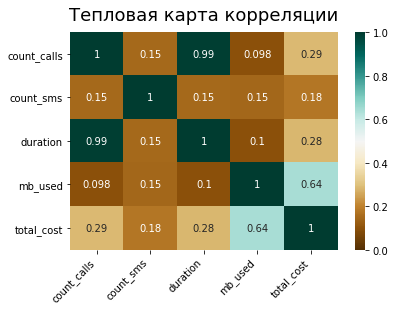

In [62]:
heatmap = sns.heatmap(means_pivot.corr(),vmin=0, vmax=1, annot=True, cmap='BrBG');
heatmap.set_title('Тепловая карта корреляции', fontdict={'fontsize':18}, pad=12);
plt.xticks(rotation=45, ha='right');

## Подведем итоги по анализу абонентов.
Каждый пятый абонент компании "Мегалайн" находиться в Москве.
70% абонентов подключены на тарифный план Смарт, с ежемесячным фиксированным платежом 550руб.
Между тем, данная категория, генерит для Оператора бОльшую часть выручки - 60%, столь существенная доля в выручке Оператора обусловлена тем, что:
1. Абонентов Смарт большинство (70% от общей базы);
2. Абоненты на тарифе Смарт не укладываются в пакет услуг предлагаемым данным тарифом и вынуждены дополнительно оплачивать услуги сверх лимита пакета. Дополнительная оплата зачастую составляет 100% от стоимости самого тарифа. 
Абоненты тарифа Ультра с фиксированной платой в 1950 руб./мес, наоборот, зачастую даже не выбирают и четверть предоставленным тарифом услуг (пожалуй кроме интернет-трафика который стабильно  пользуется спросом).
Собранные в рамках 2-х тарифов данные о кол-ве/длительности звонков, кол-ва отправленных СМС, объема потребленного интернет-трафика говорят о сильном разбросе данных параметров от абонента к абоненту, причем для данных в рамках тарифа Ультра, этот разброс еще больше. Данный факт подтверждает вычисленная дисперсия по данным параметрам.
Так например дисперсия, для выборки duration тарифа Ультра, составила почти 83000 (!), столь существенный разброс обусловлен спецификой тарифа - 3000 минут включенных в пакет. Т.е. кто то из абонентов "выговаривает" условно 50-100 минут, а кто то и более 1000 минут.Тариф Смарт, столь большим лимитом минут не обладает (включено 500 минут), в связи с этим и разброс (дисперсия) значительно меньше-21000 по сравнению с дисперсией по тарифу Ультра.

Тепловая карта визуально продемонстрировала, что на окончательную стоимость обслуживания влияет в первую очередь потребленные Гб, далее длительность разговоров и в последнюю очередь СМС.


## Проверка гипотез

**Проверка гипотезы №1**  
•	средняя выручка пользователей тарифов «Ультра» и «Смарт» различаются.  
Определим нулевую и альтернативную гипотезу.  
H₀ - "среднее генеральной совокупности (выручка) тарифа Смарт" ** РАВНО ** "средней генеральной совокупности (выручка) тарифа Ультра"  
H₁ - "среднее генеральной совокупности (выручка) тарифа Смарт" ** НЕ РАВНО ** "средней генеральной совокупности (выручка) тарифа Ультра"

Для проверки вышеозвученных допущений, воспользуемся методом для проверки гипотезы о равенстве среднего двух генеральных совокупностей по взятым из них выборкам: scipy.stats.ttest_ind с параметром equal_var раным False т.к. выше мы исследовали и знаем, что дисперсии у совокупностей различаются.

In [63]:
mean_margin_ultra = means_pivot.loc[means_pivot['tariff']=='ultra']['total_cost'].mean() 
mean_margin_smart = means_pivot.loc[means_pivot['tariff']=='smart']['total_cost'].mean() 
'Средняя выручка по тарифу Ультра = {0:.0f} руб.'.format(mean_margin_ultra)

'Средняя выручка по тарифу Ультра = 2131 руб.'

In [64]:
'Средняя выручка по тарифу Смарт = {0:.0f} руб.'.format(mean_margin_smart)

'Средняя выручка по тарифу Смарт = 1322 руб.'

In [65]:
margin_smart = means_pivot.loc[means_pivot['tariff']=='smart']['total_cost']
interested_value = means_pivot.loc[means_pivot['tariff']=='ultra']['total_cost']

alpha = .001 # критический уровень статистической значимости (0.1%).
results = st.ttest_ind (margin_smart,interested_value, equal_var = False)
print ('p-значение:',results.pvalue)
if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 


p-значение: 2.687705603639518e-52
Отвергаем нулевую гипотезу


Видим, что для нулевой гипотезы: средняя выручка у тарифов равна, нет места.

В среднем, выручка по тарифу Ультра выше выручки по тарифу Смарт 1,75 раза. Но не нужно забывать, что пользователей с тарифом Смарт гораздо больше и в целом **Основную** выручку генерят именно пользователи Смарт.

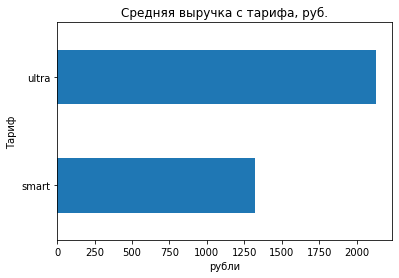

In [66]:
means_pivot.pivot_table(index='tariff', values='total_cost', aggfunc='mean').plot( kind = 'barh');
plt.title('Средняя выручка с тарифа, руб.')
plt.xlabel('рубли')
plt.ylabel('Тариф')
plt.legend().remove()
plt.show()

**Проверка гипотезы №2:**

•	средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов.

H₀ - средняя выручка абонентов из Москвы **РАВНА** "средней выручке из других городов.

H₁ - средняя выручка абонентов из Москвы **НЕ РАВНА** "средней выручке из других городов.

Для проверки вышеозвученных допущений, воспользуемся методом для проверки гипотезы о равенстве среднего двух генеральных совокупностей по взятым из них выборкам: scipy.stats.ttest_ind с параметром equal_var раным False т.к. выше мы ислледовали и знаем, что дисперсии у совокупностей различаются.

In [67]:
margin_msk= means_pivot.loc[means_pivot['city']=='Москва']['total_cost']
interested_value = means_pivot.loc[means_pivot['tariff']!='Москва']['total_cost']

alpha = .01 # критический уровень статистической значимости (0.1%).
results = st.ttest_ind (margin_msk,interested_value, equal_var = False)
print ('p-значение:',results.pvalue)
if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 

p-значение: 0.448105252745308
Не получилось отвергнуть нулевую гипотезу


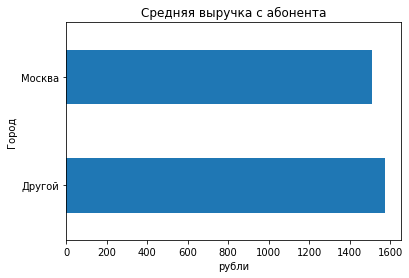

Средняя выручка от абонента г.Москва = 1510 руб.
Средняя выручка от абонета города "Другой" = 1576 руб.


In [68]:
means_pivot.pivot_table(index='city', values='total_cost', aggfunc='mean').plot( kind = 'barh');
plt.title('Средняя выручка с абонента')
plt.xlabel('рубли')
plt.ylabel('Город')
plt.legend().remove()
plt.show()
mean_margin_msk = means_pivot.loc[means_pivot['city']=='Москва']['total_cost'].mean() 
mean_margin_oth = means_pivot.loc[means_pivot['city']=='Другой']['total_cost'].mean() 
print ('Средняя выручка от абонента г.Москва = {0:.0f} руб.'.format(mean_margin_msk))
print ('Средняя выручка от абонета города "Другой" = {0:.0f} руб.'.format(mean_margin_oth))

Видим, что нулевая гипотеза имеет право на существование, действительно, между выручкой от абонента в Мосвке и в доугом городе, практически нет разницы. Это хороший повод расширить свое присутствие в регионах.

## Общий вывод

**По результату исследования, можно сформировать следующие выводы (и рекомендации для развития бизнеса):**
1. Абоненты в 30% случаях находяться в г. Москва и СПб (20 и7 %% соответственно), средняя выручка полученная от абонента г. Москвы практически равна(!) средней выручки из другого города (1495 и 1454 руб. соответсвенно), таким образом имеет смысл провести доп. исследование об экономической целесообразности расширения абонентской базы в других городах, возможно цена привлечения абонента в регионах будет ниже чем в Москве и тогда рекламную компанию есть смысл усилить по регионам.
2. Средняя выручка от тарифного плана Ультра, практически в 2 раза выше чем выручка от тарифного плана Смарт (2106 и 1234 руб. соответственно), между тем основной поток выручки генерят абоненты Смарт. Доля выручки от абонентов Смарт достигиает 60%, это связано с тем, что распределение абонентов следующее: 70% это абоненты Смарт, 30% абоненты Ультра.
3. Абонентам Смарт, существующего объема услуг предоставляемым тарифом, существенно не з
хватает. Абоненты постоянно "докупают" минуты разговора (100-150 минут в месяц) и 1-3 Гб интернет-трафика. Затраты абонентов на доп. услуги сопоставимы со стоимостью самого тарифа Смарт равного 550руб и достигают в среднем 1 234руб (550 руб тариф + доп.услуги). Абоненты Ультра напротив,в большинстве своем не используют в полной мере объем предоставляемых пакетом услуг: "минуты", "СМС-ки" просто "сгорают", а в месте с ними и проплаченные деньги за пакет в размере 1 950 руб..   
В данной ситуации, для Оператора целесообразно разработать дополнительный тариф (или взамен существующего), который с учетом данного исследования смог бы предложить как действующим абонентам так и новым клиентам более привлекательное наполнение пакета услуг причем с более экономической выгодой для самого Оператора.**

